# Data Preprocessing & Feature Engineering
In this notebook I will continue preparing the Ames housing data fro modeling by:
- handling outliers
- engineering new features to enhance model performance
- splitting the data into training and testing sets
- scaling numerical features for model compatibility

## Load Data

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

df = pd.read_csv('../data/ames_housing_cleaned.csv')

## Handling Outliers
In this step, I will focus on a set of core features identified during EDA as being strongly correlated with `SalePrice`. Additionally, I will include features necessary for constructing engineered variables.

**Core Features (Strong Correlation with SalePrice):**
- `Overall Qual`
- `Gr Liv Area`
- `Garage Cars`
- `Total Bsmt SF`
- `Year Built` (to be used for calculating `HouseAge`)

**Additional Features for Engineering:**
- `1st Flr SF` and `2nd Flr SF` (to compute `Total SF`)
- `Yr Sold` (to compute `House Age`)

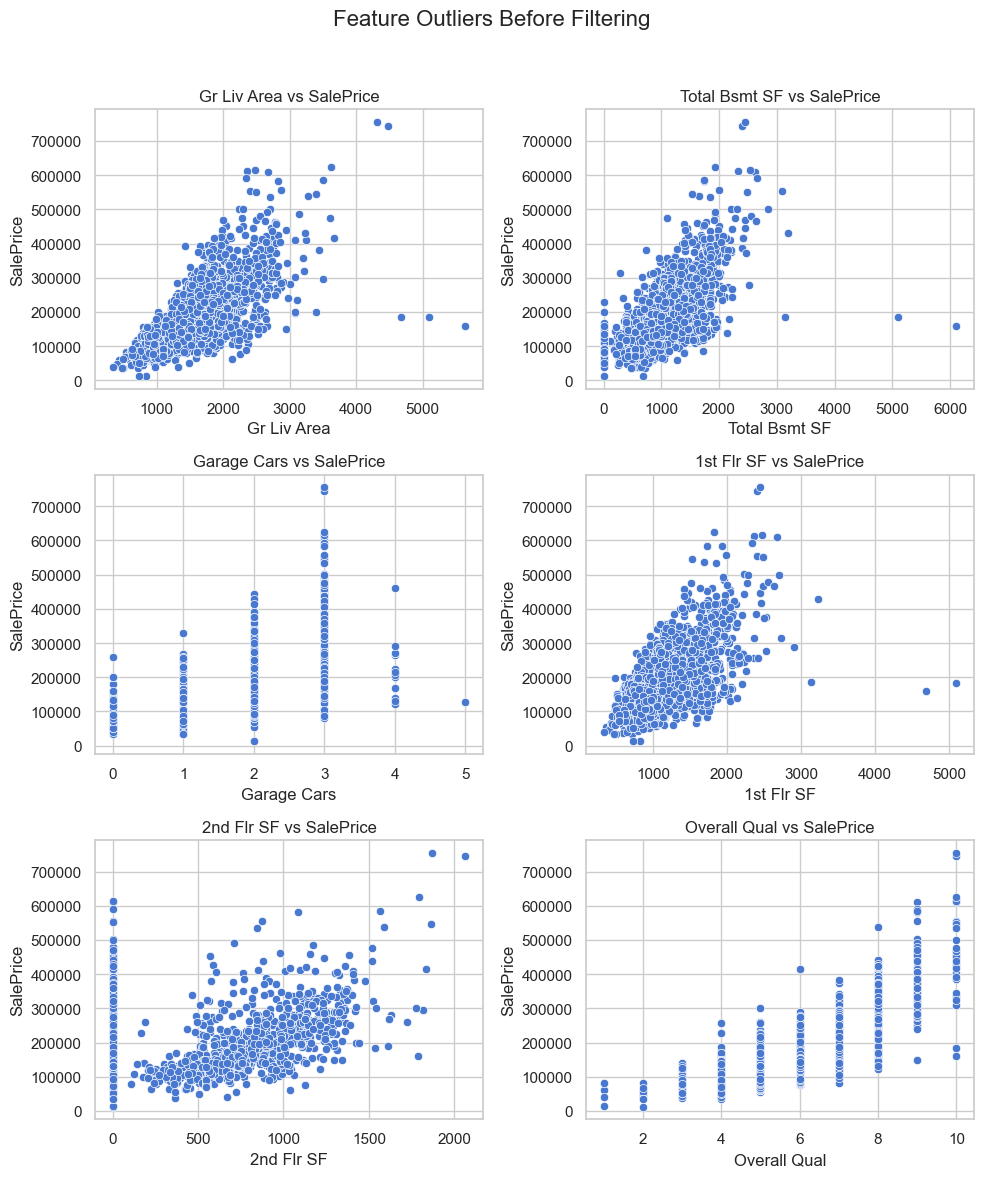

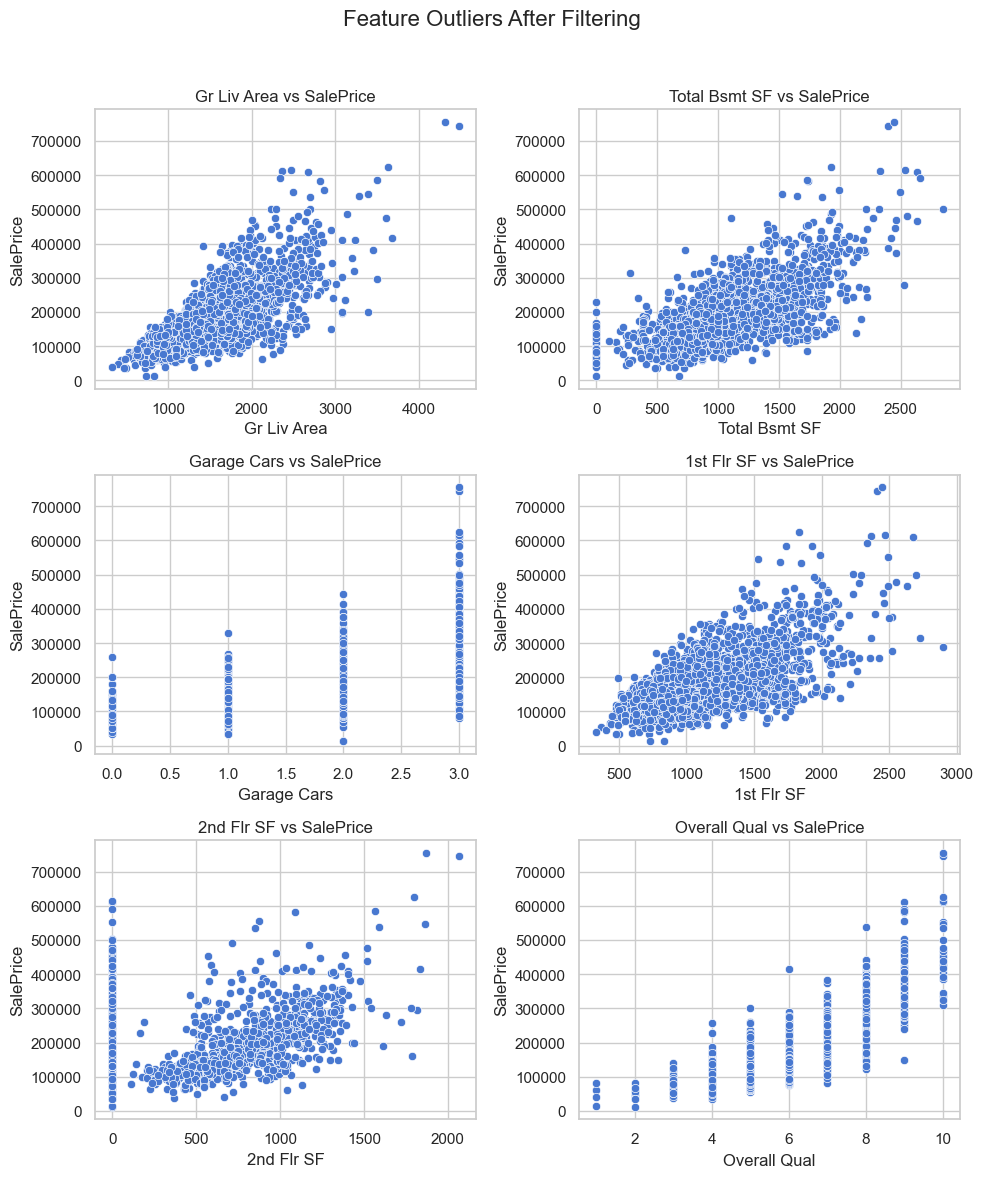

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", palette="muted", context="notebook")

def plot_outliers_grid(df, features, target='SalePrice', title=''):
    fig, axs = plt.subplots(3, 2, figsize=(10, 12))
    axs = axs.flatten()
    
    for i, feature in enumerate(features):
        sns.scatterplot(x=df[feature], y=df[target], ax=axs[i])
        axs[i].set_title(f'{feature} vs {target}')
    
    plt.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Define features
outlier_features = ['Gr Liv Area', 'Total Bsmt SF', 'Garage Cars', '1st Flr SF', '2nd Flr SF', 'Overall Qual']

# Plot before removing outliers
plot_outliers_grid(df, outlier_features, title='Feature Outliers Before Filtering')

# Apply outlier filters
df_filtered = df.copy()
df_filtered = df_filtered[df_filtered['Gr Liv Area'] < 4500]
df_filtered = df_filtered[df_filtered['Total Bsmt SF'] < 3000]
df_filtered = df_filtered[df_filtered['Garage Cars'] <= 3]
df_filtered = df_filtered[df_filtered['1st Flr SF'] < 3000]

# Plot after removing outliers
plot_outliers_grid(df_filtered, outlier_features, title='Feature Outliers After Filtering')

I visualized key numeric features against `SalePrice` to identify outliers.  
Based on those plots, I removed extreme values for:
- **Gr Liv Area** (> 4500 sq ft)
- **Total Bsmt SF** (> 3000 sq ft)
- **Garage Cars** (> 3)
- **1st Flr SF** (> 3000 sq ft)

No action was needed for **2nd Flr SF** and **Overall Qual**.  
I also noted the potential for a binary feature for `2nd Flr SF` and `Total Bsmt SF` later.

## Feature Engineering

Based on EDA and correlation analysis, I will focus on key features strongly related to `SalePrice` and create derived features — such as `TotalSF` and `HouseAge` — to enhance predictive power while keeping the feature set concise and relevant.

In [4]:
# Total Square Footage = Gr Liv SF + Total Bsmt SF
df_filtered['TotalSF'] = df_filtered['Gr Liv Area'] + df_filtered['Total Bsmt SF']

# House Age = YrSold - YearBuilt
df_filtered['HouseAge'] = df_filtered['Yr Sold'] - df_filtered['Year Built']


## Splitting Data

With features selected, missing values handled, and transformations applied, I will split the data into training and test sets to prepare for model building and evaluation.

In [5]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df_filtered[['TotalSF', 'HouseAge', 'Garage Cars', 'Overall Qual']]
y = df_filtered['SalePrice']

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Scaling Numerical Features

To standardize the range of numeric features and prevent any single feature from dominating the model, I will apply standard scaling. The scaler is fit on the training data and then applied to both the training and test sets to avoid data leakage.

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Save feature names for later use
feature_names = X_train.columns.tolist()

# Fit on training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data with same scaler
X_test_scaled = scaler.transform(X_test)

# 3. Convert scaled arrays back to DataFrames with column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

### Export Data

In [7]:
# Export the processed dataset
import joblib
joblib.dump(scaler, '../models/scaler.pkl')
joblib.dump(feature_names, "../data/feature_names.pkl")
joblib.dump(X_train_scaled, "../data/X_train_scaled.pkl")
joblib.dump(X_test_scaled, "../data/X_test_scaled.pkl")
joblib.dump(y_train, "../data/y_train.pkl")
joblib.dump(y_test, "../data/y_test.pkl")

['../data/y_test.pkl']

## Summary

In this notebook, I filtered out outliers based on earlier analysis, performed feature engineering by creating derived features like `TotalSF` and `HouseAge`, and prepared the data for modeling. No categorical encoding was necessary for the selected features. I applied standard scaling after splitting the data into training and test sets. The dataset is now ready for model building and evaluation in the next phase of the project.